In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import MultipleLocator

from pathlib  import Path

In [19]:
df = pd.read_csv("results_merged.csv")
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)

In [89]:
sns.set_context("paper", font_scale=1.5)
sns.set_style("whitegrid")

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.family"] = "Arial"
mpl.rcParams["figure.figsize"] = [6.4, 4.8]
mpl.rcParams["axes.titlesize"] = 20

In [104]:
def generate_plots_by_metric(df, varying_hyperparam, fixed_hyperparam, value_fixed):
    for metric in ["evaluation_accuracy", "evaluation_loss", "training_time"]:
        fig, ax = plt.subplots(figsize=(10, 6))
        ax = sns.lineplot(df[df[fixed_hyperparam] == value_fixed ], palette = sns.color_palette("cubehelix", 5), x = "server_round", y = metric, hue = varying_hyperparam, marker = "o")
        plt.legend(title = varying_hyperparam.replace("_", " ").capitalize(), handlelength=1, borderpad=1, bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., labelspacing=1)
        for h in ax.legend_.legend_handles: 
            h.set_marker("o")
        sns.despine(right = True)
        plt.xlabel("Server round")
        plt.ylabel(metric.replace("_", " ").capitalize()) 
        ax.xaxis.set_minor_locator(MultipleLocator(5))
        ax.xaxis.set_tick_params(which="minor", bottom=True, direction="out", width=1)
        plt.title(f"{metric.replace('_', ' ').capitalize()} over training, with {fixed_hyperparam.replace('_', ' ')} = {value_fixed}")
        plt.xlim(0,101)
        fig.savefig(f"images/{metric}_{fixed_hyperparam}_{value_fixed}.png", dpi=1200,  bbox_inches="tight")

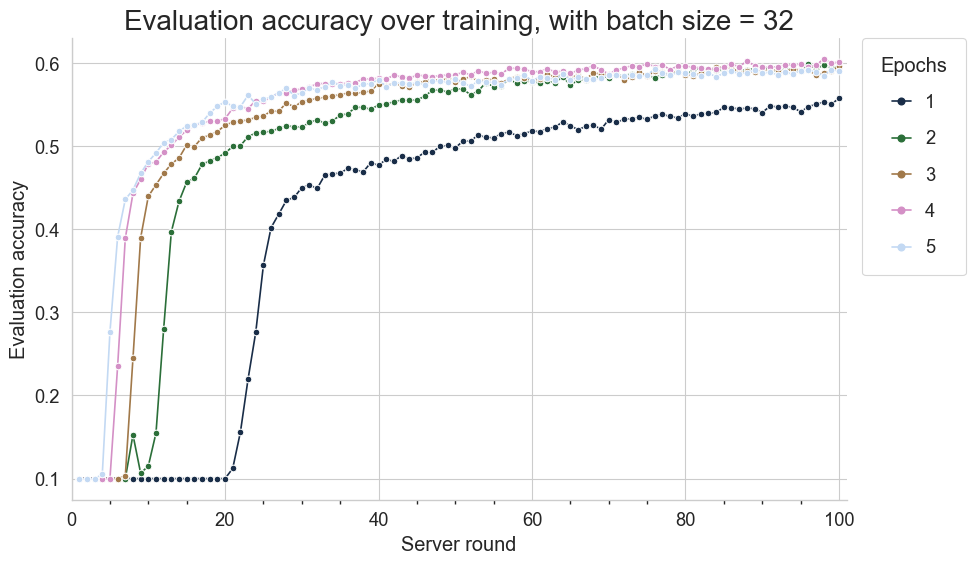

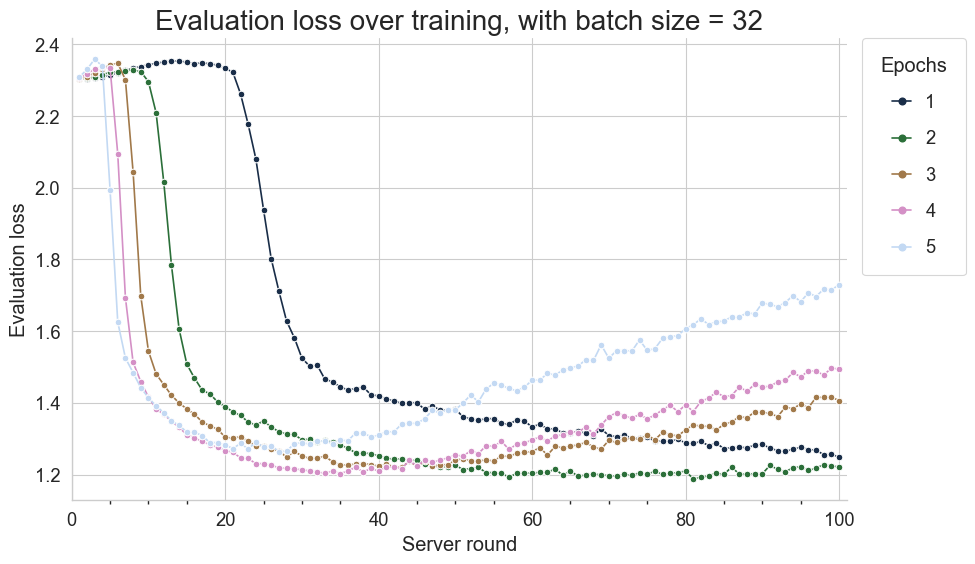

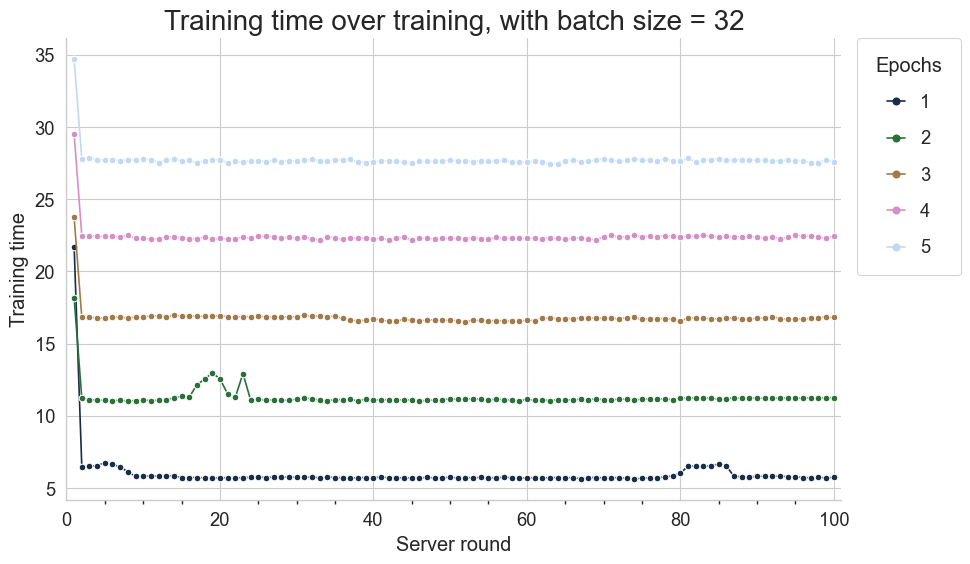

In [105]:
generate_plots_by_metric(df, "epochs", "batch_size", 32)

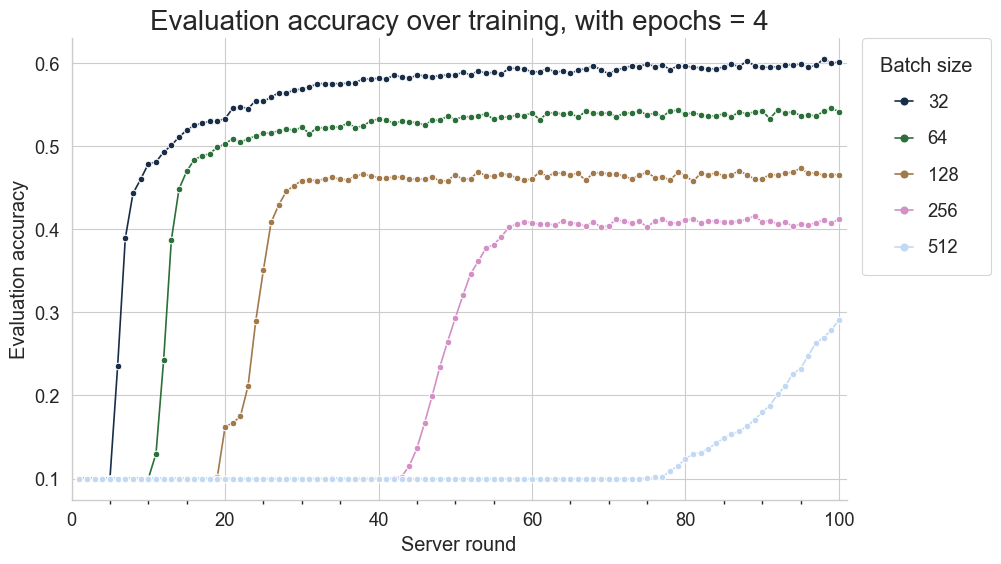

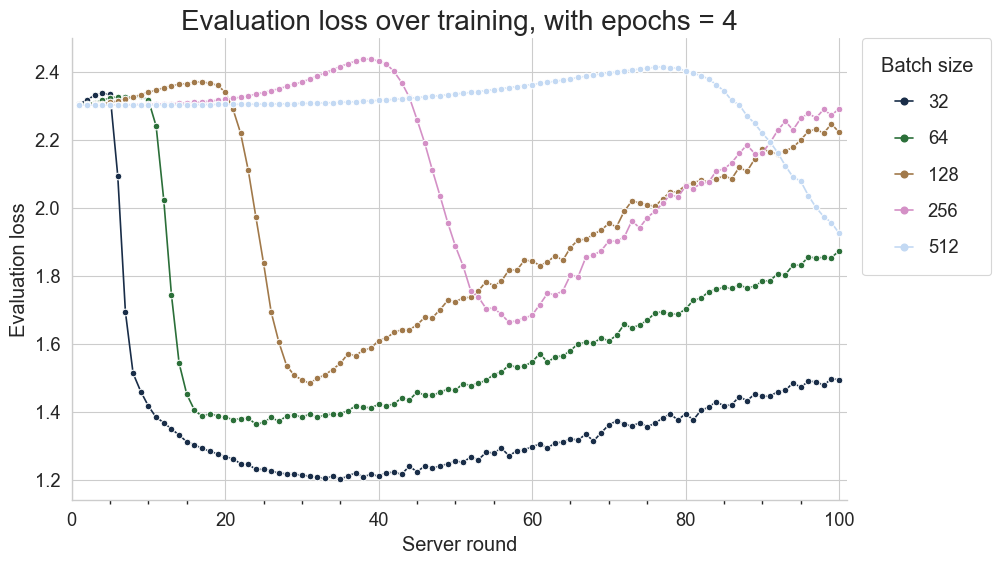

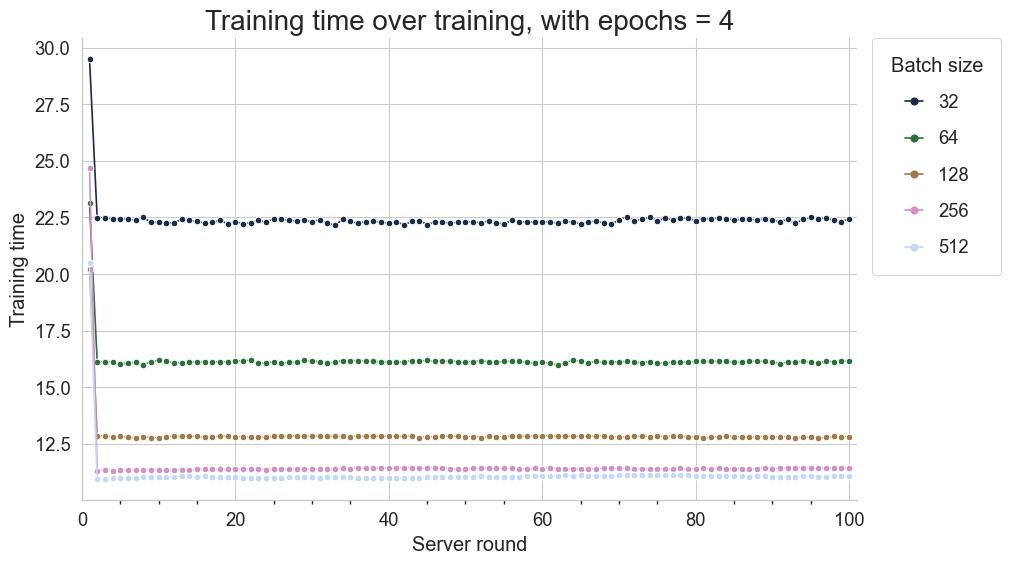

In [106]:
generate_plots_by_metric(df, "batch_size", "epochs", 4)

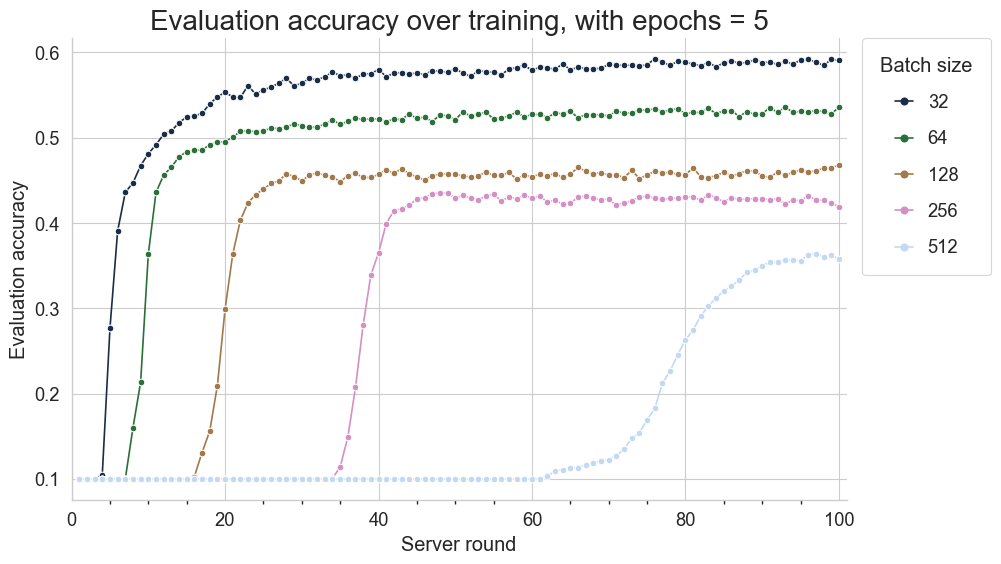

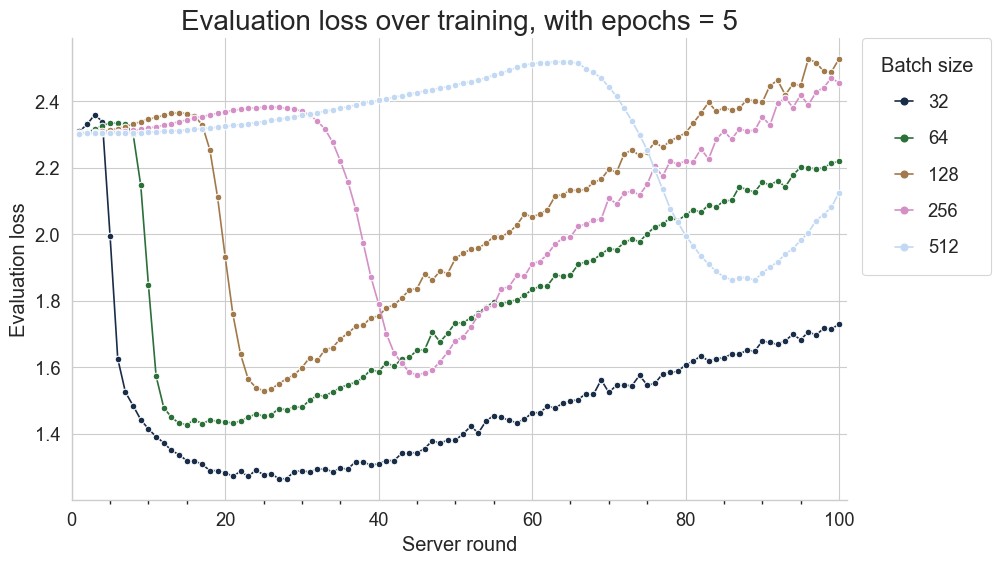

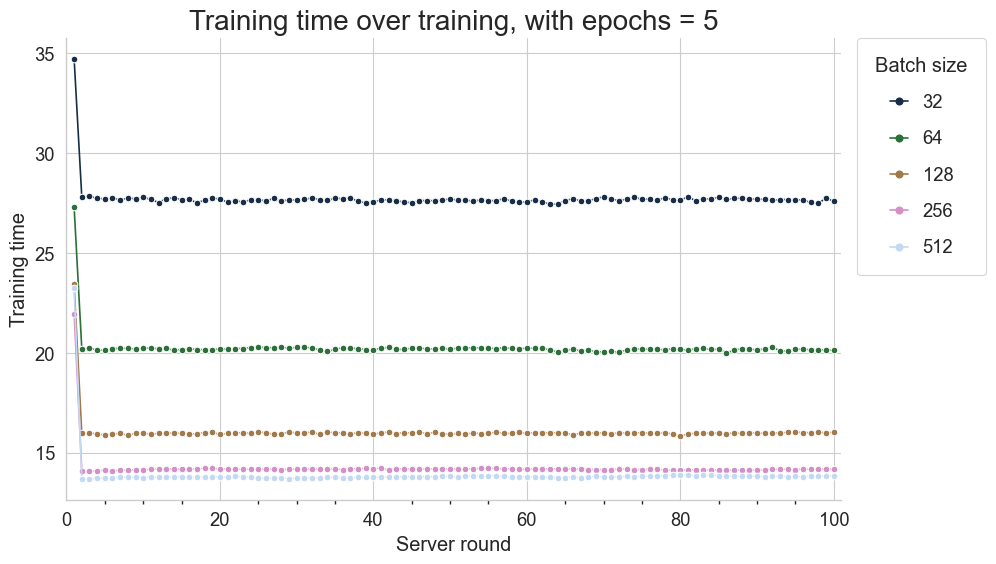

In [107]:
generate_plots_by_metric(df, "batch_size", "epochs", 5)